# 1. 准备数据集

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [40]:
# 生成一个用于二分类的二维特征数据集
x, y = make_classification(
    n_samples=200,        # 样本数量
    n_features=2,         # 特征数量
    n_redundant=0,        # 冗余特征数量
    n_classes=2,          # 类别数
    n_clusters_per_class=1, # 每个类别的簇数
    random_state=1024     # 随机种子，保证结果可复现
)

In [41]:
x.shape, y.shape

((200, 2), (200,))

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 233, stratify = y)

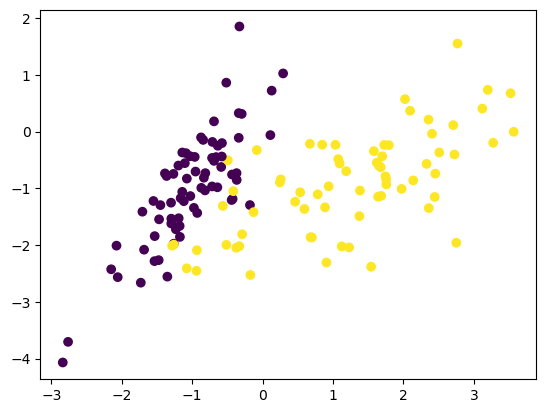

In [43]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

# 2. sklearn中的逻辑回归

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [46]:
# 模型在训练集上的得分
clf.score(x_train, y_train)

0.9357142857142857

In [47]:
clf.score(x_test, y_test)

0.95

In [48]:
clf.predict(x_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [49]:
clf.predict_proba(x_test)[:5]

array([[6.16354809e-05, 9.99938365e-01],
       [9.70574901e-01, 2.94250991e-02],
       [1.52971106e-02, 9.84702889e-01],
       [9.66935836e-01, 3.30641638e-02],
       [7.08449171e-02, 9.29155083e-01]])

In [ ]:
# 将结果格式化为字符串 p[0] + p[1] =1
proba_str = [f"{p[0]:.2f}, {p[1]:.2f}" for p in clf.predict_proba(x_test)[:5]]
# 打印格式化后的结果
for i, p in enumerate(proba_str):
    print(f"样本 {i}: {p}")

样本 0: 0.00, 1.00
样本 1: 0.97, 0.03
样本 2: 0.02, 0.98
样本 3: 0.97, 0.03
样本 4: 0.07, 0.93


样本 0: 0.00, 1.00
样本 1: 0.97, 0.03
样本 2: 0.02, 0.98
样本 3: 0.97, 0.03
样本 4: 0.07, 0.93


In [ ]:
np.argmax(clf.predict_proba(x_test), axis = 1)[:5]

array([1, 0, 1, 0, 1])

# 3. 超参数搜索

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 定义逻辑回归的超参数搜索空间
params = [
    {
        # 第一组参数：L1或L2正则化，liblinear求解器
        # penalty: 正则化方式，'l1'为L1正则化（可产生稀疏解），'l2'为L2正则化（常用的岭回归）
        # C: 正则化强度的倒数，值越小正则化越强
        # solver: 'liblinear'是一个适用于小型数据集的优化算法，支持L1和L2正则化
        'penalty': ['l2', 'l1'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear']
    },
    {
        # 第二组参数：无正则化，lbfgs求解器
        # penalty: 'none'表示不使用正则化
        # C: 此时C参数无实际作用，但需要传递
        # solver: 'lbfgs'是一种拟牛顿法优化算法，适合中小型数据集，支持多类别分类，支持无正则化
        'penalty': ['none'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['lbfgs']
    },
    {
        # 第三组参数：弹性网正则化，saga求解器
        # penalty: 'elasticnet'为弹性网正则化（L1和L2的组合）
        # C: 正则化强度的倒数
        # l1_ratio: L1与L2的混合比例，0为纯L2，1为纯L1
        # solver: 'saga'是适用于大规模数据的优化算法，支持L1、L2和弹性网正则化
        # max_iter: 最大迭代次数，防止收敛太慢
        'penalty': ['elasticnet'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
        'solver': ['saga'],
        'max_iter': [200]
    }
]

In [ ]:
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
    n_jobs=-1
)

In [ ]:
grid.fit(x_train, y_train)

/usr/local/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/envs/ML/lib/py

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['none'], 'solver': ['lbfgs']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                          'max_iter': [200], 'penalty': ['elasticnet'],
                          'solver': ['saga']}])

In [ ]:
grid.best_score_

np.float64(0.95)

In [ ]:
grid.best_estimator_.score(x_test, y_test)

0.9333333333333333

In [ ]:
grid.best_params_

{'C': 1,
 'l1_ratio': 0.75,
 'max_iter': 200,
 'penalty': 'elasticnet',
 'solver': 'saga'}